In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [2]:
def plot_event(df, event_number):
    event_row = df[df['#Event Number'] == str(event_number)]
    if not event_row.empty:
        values = event_row.iloc[0]['Values']
        
        plt.figure(figsize=(10, 6))
        plt.plot(values)
        plt.title(f'Event Number {event_number}')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.show()
    else:
        print(f"Event number {event_number} not found. Please select a valid event number.")


In [3]:
import pandas as pd

def process_file(file_path):
    # Initialize an empty list to store the data for the DataFrame
    data = []

    with open(file_path, 'r') as file:
        while True:
            # Read 7 lines for headers
            headers = [file.readline().strip() for _ in range(7)]
            if not headers[0]:  # Break if end of file
                break

            # Read 1030 lines for values
            values = [int(file.readline().strip()) for _ in range(1030)]

            # Create a dictionary to store the headers
            header_dict = {}
            for header in headers:
                key, value = header.split(':')
                header_dict[key] = value.strip()

            # Add the array of values to the dictionary
            header_dict['Values'] = values

            # Append the dictionary to the data list
            data.append(header_dict)

    # Create the DataFrame from the list of dictionaries
    df = pd.DataFrame(data)

    return df


In [4]:
# Example usage
file_pattern = '95.00*.txt'
all_files = glob.glob(file_pattern)

# Initialize an empty DataFrame to hold all data
all_data = pd.DataFrame()

# Process each file and concatenate the results
for file_path in all_files:
    df = process_file(file_path)
    all_data = pd.concat([all_data, df], ignore_index=True)

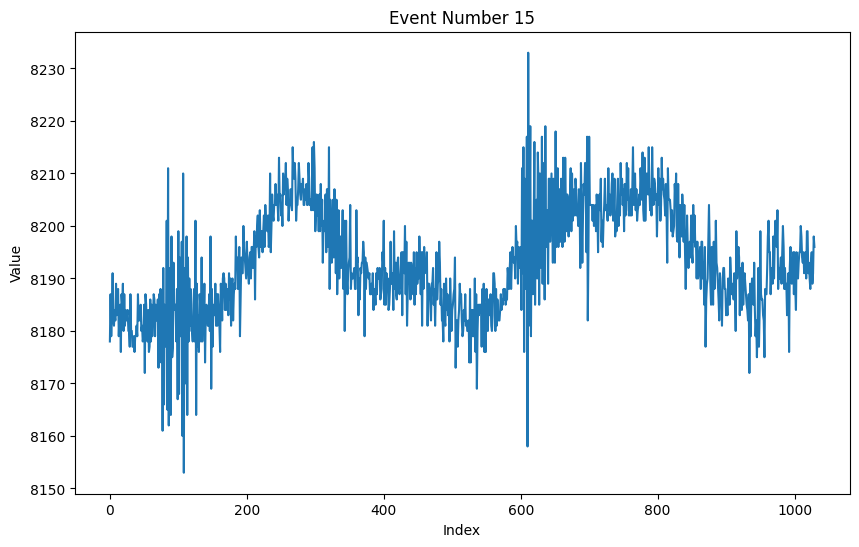

In [5]:
plot = plot_event(all_data, 15)

In [6]:
(all_data)

,#Record Length,#BoardID,#Channel,#Event Number,#Pattern,#Trigger Time Stamp,#DC offset (DAC),Values
0,1030,31,0,16,0x0000,203831,0x7FFF,"[8193, 8187, 8193, 8190, 8185, 8198, 8163, 821..."
1,1030,31,0,17,0x0000,216331,0x7FFF,"[8200, 8195, 8196, 8197, 8202, 8199, 8196, 819..."
2,1030,31,0,18,0x0000,228831,0x7FFF,"[8191, 8190, 8199, 8193, 8190, 8187, 8188, 819..."
3,1030,31,0,19,0x0000,241331,0x7FFF,"[8193, 8206, 8207, 8207, 8200, 8197, 8202, 820..."
4,1030,31,0,20,0x0000,253831,0x7FFF,"[8224, 8199, 8214, 8203, 8204, 8200, 8203, 822..."
...,...,...,...,...,...,...,...,...
71477,1030,31,0,35801,0x0000,1182009745,0x7FFF,"[8199, 8198, 8197, 8196, 8193, 8191, 8195, 819..."
71478,1030,31,0,35802,0x0000,1182022245,0x7FFF,"[8206, 8209, 8202, 8203, 8204, 8209, 8205, 820..."
71479,1030,31,0,35803,0x0000,1182034745,0x7FFF,"[8207, 8215, 8222, 8215, 8218, 8208, 8210, 820..."
71480,1030,31,0,35804,0x0000,1182047245,0x7FFF,"[8198, 8208, 8198, 8205, 8192, 8202, 8208, 819..."


In [7]:
#export to csv
#all_data.to_csv('all_data.csv', index=False)

In [1]:
import ROOT

ModuleNotFoundError: No module named 'ROOT'